DSC2020
-----

Additional attribute generation
-----

In [ ]:
'''
addditional attribute making functions
'''
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


def noiseFilter(df):
    df = df[['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER','FL_NUM','Route',
          'ORIGIN', 'DEST','DEST_STATE', 'CRS_DEP_TIME','DISTANCE', 'PASSENGERS', 'EMPFTE',
           'NET_INCOME', 'OP_REVENUES', 'fare', 'carrier_lg', 'large_ms',
           'fare_lg', 'HUBS', 'ARR_DELAY_GROUP']]

    df = df.replace(np.nan, 'rm_val')
    df = df.replace('', 'rm_val')
    col = df.columns
    for c in col:
        df = df[df[c] != 'rm_val']
    return df

def makeDisCat(data):
    '''
    short-term travel and long-term travel rule
    https://www.pointhacks.com.au/differences-short-medium-long-haul-flights/
    '''
    rule = 3000
    def disCat(row):
        if row['DISTANCE'] >= rule:
            return 1
        else:
            return 0 
        
    data['DISTANCE_CAT'] = data.apply (lambda row: disCat(row), axis=1)
    return data

def makeAvgFareperMile(data):
    
    def avgfpm(row):
        return  row['fare'] / row['DISTANCE']
        
    data['AVG_FARE_MILE'] = data.apply (lambda row: avgfpm(row), axis=1)
    return data


def makeOriginState(data):
    
    d = data.drop(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER','FL_NUM','Route',
              'CRS_DEP_TIME','DISTANCE', 'PASSENGERS', 'EMPFTE',
               'NET_INCOME', 'OP_REVENUES', 'fare', 'carrier_lg', 'large_ms',
               'fare_lg', 'HUBS', 'ARR_DELAY_GROUP'], axis=1).to_dict(orient='records').copy()

    dic = {}
    for r in d:
        dic[r['ORIGIN']] = 0
    for r in  d:
        dic[r['DEST']] = r['DEST_STATE']
        
    def f(row):
        return dic[row['ORIGIN']] 
    
    data['ORIGIN_STATE'] = data.apply (lambda row: f(row), axis=1)
    
    return data
    
def dataType(data, catagorical):
    
    def hhmm(hm):
        arr = str(hm)
        if (len(arr) > 3):
            t = (int(arr[:2])*60+int(arr[2:]))
        elif len(arr) == 3:
            t = (int(arr[0])*60+int(arr[1:]))
        elif len(arr) <= 2:
            if arr == '0.0':
                t = 0
            else:
                t = int(arr)
    
        return t
    
    cat_data = df.drop(df[df['carrier_lg'] == '0'].index)
    
    cat_data['CRS_DEP_TIME'] = cat_data['CRS_DEP_TIME'].astype('int')
    cat_data['CRS_DEP_TIME'] = cat_data['CRS_DEP_TIME'].apply(hhmm)
    
    cat_data['YEAR'] = cat_data['YEAR'].astype('int')
    cat_data['QUARTER'] = cat_data['QUARTER'].astype('int')
    cat_data['MONTH'] = cat_data['MONTH'].astype('int')
    cat_data['DAY_OF_MONTH'] = cat_data['DAY_OF_MONTH'].astype('int')
    cat_data['DAY_OF_WEEK'] = cat_data['DAY_OF_WEEK'].astype('int')
    cat_data['DISTANCE'] = cat_data['DISTANCE'].astype('int')
    cat_data['PASSENGERS'] = cat_data['PASSENGERS'].astype('int')
    cat_data['EMPFTE'] = cat_data['EMPFTE'].astype('int')
    cat_data['NET_INCOME'] = cat_data['NET_INCOME'].astype('float')
    cat_data['OP_REVENUES'] = cat_data['OP_REVENUES'].astype('float')
    cat_data['fare'] = cat_data['fare'].astype('float')
    cat_data['large_ms'] = cat_data['large_ms'].astype('float')
    cat_data['fare_lg'] = cat_data['fare_lg'].astype('float')
    cat_data['OP_REVENUES'] = cat_data['OP_REVENUES'].astype('float')
    cat_data['AVG_FARE_MILE'] = cat_data['AVG_FARE_MILE'].astype('float')
    
    for cat in catagorical:
        cat_data[cat] = cat_data[cat].astype('category')
        
    cat_data['ARR_DELAY_GROUP'] = cat_data['ARR_DELAY_GROUP'].astype('category')

    return cat_data

In [ ]:
%%time

ourAtt = 'ourAtt.csv'
df = pd.read_csv(ourAtt)

categorical = ['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','CARRIER','ORIGIN','DEST','DEST_STATE','DEST_STATE','DISTANCE_CAT', 'carrier_lg','HUBS']

df = noiseFilter(df)
df = makeDisCat(df)
df = makeOriginState(df)
df = makeAvgFareperMile(df)
df = dataType(df, categorical)
df = df.reset_index(drop=True)

df.to_csv(r'cleanData.csv', index = False)

One-Hot Encoding for all categorical attributes
-----

In [ ]:
'''
usStates = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
            'LA','ME','MD','MA','MI','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH',
            'OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
'''


In [ ]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


def oneHot(data,oneHot_catlist):
    lb = LabelBinarizer()
    for cat in oneHot_catlist:
        print(cat)
        lb_results = lb.fit_transform(data[cat])
        colN = []
        for c in lb.classes_:
            colN.append(cat+'_'+str(c))
        print(colN)
        print(lb_results)
        lb_results_df = pd.DataFrame(lb_results, columns=colN)
        data = pd.concat([data, lb_results_df],axis=1)
        data = data.drop(columns=cat)
        
    return data

cleanData = 'cleanData.csv'
df = pd.read_csv(cleanData)


oneHot_catlist = ['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','CARRIER','ORIGIN','DEST', 'DEST_STATE', 'carrier_lg']
oneHot_data = oneHot(df, oneHot_catlist)

oneHot_data.to_csv(r'oneHotData.csv', index = False)

Load calculatable portion of oneHotData
----

In [1]:
import pandas as pd
import csv

oneHotData = 'oneHotData.csv'

data= []
with open(oneHotData) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            line_count += 1
            data.append(row)
            if line_count > 999999:
                break
        
print(line_count)

data = pd.DataFrame(data[1:], columns=data[0])


1000001


In [ ]:
OutputYs = 'ARR_DELAY_GROUP'
oneHot_data = oneHot_data.sample(frac=1)
oneHot_data[OutputYs] = oneHot_data[OutputYs].astype('int')

Ydata = oneHot_data[OutputYs].copy()
Xdata = oneHot_data.drop([OutputYs], axis=1)

Xdata.to_csv(r'oneHotDataX.csv', index = False)
Ydata.to_csv(r'oneHotDataY.csv', index = False)

In [6]:
data.describe().transpose()

,count,unique,top,freq
YEAR,1000000,2,2018,665959
FL_NUM,1000000,6884,481,569
Route,1000000,4138,3383.0,3246
CRS_DEP_TIME,1000000,1238,360,20612
DISTANCE,1000000,1179,337,7661
...,...,...,...,...
carrier_lg_G4,1000000,2,0,989004
carrier_lg_NK,1000000,2,0,997612
carrier_lg_SY,1000000,2,0,999533
carrier_lg_UA,1000000,2,0,876702


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

Xdata = pd.read_csv('oneHotDataX.csv')
Ydata = pd.read_csv('oneHotDataY.csv')

Xdata.describe().transpose()

Normalization
----

In [ ]:


XdataN = Xdata[0:1000000].copy()

predictors = list(XdataN.columns)

XdataN[predictors] = XdataN[predictors]/XdataN[predictors].max()
XdataN.describe().transpose()

In [ ]:
YdataN = Ydata[0:1000000].copy()

def binary(x):
    if x['ARR_DELAY_GROUP']>0:
        return 1
    else:
        return 0

YdataN = YdataN.apply(lambda x: binary(x), axis=1)
YdataN

Model training process
-----

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(XdataN, YdataN, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

In [ ]:
# print(mlp.score(predict_test,y_test)
y_train.shape

In [ ]:
from sklearn.model_selection import train_test_split


# Xcat = result_df[categorical]
# Xdata = oneHot_data[inputXs]
# Ydata = oneHot_data[OutputYs]

from sklearn import preprocessing


normalized_X = preprocessing.normalize(Xdata)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(normalized_X)

npXdata = X_train_minmax


npYdata = Ydata.to_numpy()

In [ ]:
import xdeep

In [ ]:
X_train = npXdata[:450000]
X_test = npXdata[450000:]

Y_train = npYdata[:450000]
Y_test = npYdata[450000:]
nb_classes = np.unique(Y_train)
print(nb_classes.size)
np.size(X_train, 1)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from anchor import utils

c = RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(X_train,Y_train)

In [ ]:
import xdeep.xlocal.perturbation.xdeep_tabular as xdeep_tabular
%load_ext autoreload
%autoreload 2

explainer = xdeep_tabular.TabularExplainer(c.predict_proba, ['<=50K', '>50K'], inputXs, X_train,
                                           categorical_features=Xcat, categorical_names=categorical)

In [ ]:
def tf_cov(x):
    mean_x = tf.reduce_mean(x, axis=0, keep_dims=True)
    mx = tf.matmul(tf.transpose(mean_x), mean_x)
    vx = tf.matmul(tf.transpose(x), x)/tf.cast(tf.shape(x)[0], tf.float32)
    cov_xx = vx - mx
    return cov_xx



In [ ]:
Y_train = Y_train.reshape(np.size(Y_train, 0), 1)
Y_test = Y_test.reshape(np.size(Y_test, 0), 1)
# nb_classes = np.unique(Y_train)
# print(nb_classes)

In [ ]:
import tensorflow as tf
learning_rate = 0.1
training_epochs = 1000

nb_classes = np.unique(Y_train).size
inputSize = np.size(X_train, 1)
outputSize = 1

X = tf.placeholder(tf.float32, shape=[None, inputSize])
Y = tf.placeholder(tf.int32, shape=[None, outputSize])
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

W1 = tf.Variable(tf.random_normal([inputSize, 10]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([10]), name = 'bias2')
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, nb_classes]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([nb_classes]), name = 'bias3')
logits = tf.matmul(L2, W3) + b3


hypothesis = tf.nn.softmax(logits)
# cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        sess.run([cost, optimizer], feed_dict={X: X_train, Y: Y_train})
        if epoch % 200 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: Y_train})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(epoch, loss, acc))
    cov = sess.run(tf_cov(tf.constant(X_train, dtype=tf.float32)))
    pred = sess.run(prediction, feed_dict= {X: X_train})
    for p, y in zip(pred, Y_train.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p==int(y), p, int(y)))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
pred = clf.predict(X_test)
for p, y in zip(pred, Y_test.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p==int(y), p, int(y)))

1.   one-hot carrier_lg  
inputXs =   
['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',  
 'CARRIER', 'FL_NUM', 'Route', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',  
 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'PASSENGERS', 'EMPFTE',  
 'NET_INCOME', 'OP_REVENUES', 'fare', 'large_ms',  
 'fare_lg', 'HUBS', '0', 'AA', 'AS', 'B6', 'DL', 'F9',  
 'G4', 'NK', 'SY', 'UA', 'WN']  
OutputY =   
'ARR_DELAY_GROUP'  
logreg.score(X_test,Y_test)  
0.43208

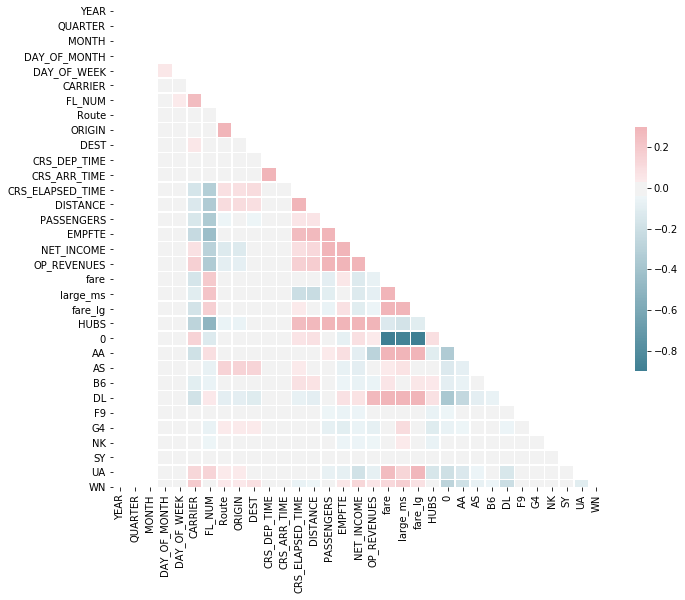